# Session 6: Coding Solution

```{contents}

```

## Coding Practice

### How to use SVM model in  `sklearn`

The `sklearn` library defines model SVM as SVC - Support Vector Classification, similar to SVR - Support Vector Regression

How to use `SVC` model, similar to other models from `sklearn`. However we need to consider theses parameters:
- `kernel` type of kernel we use, most popular ones are `['linear', 'poly', 'rbf']`
- `C`: a trade-off between accuracy and simplicity of model (The more complex the model, the greater the likelihood of overfitting occurring)
- `gamma`: Apply when `kernel='poly' or 'rbf'`

More details [here](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

### Linear Kernel

**Prepare the dataset with this function**

In [ ]:
def generate_linear_data(mean_pos, cov_pos, mean_neg, cov_neg, size):

  # set seed when using random
  np.random.seed(42)

  # generate positive samples
  x_pos = np.random.multivariate_normal(mean_pos, cov_pos, size)
  y_pos = np.ones(size, dtype=int)

  # generate negative samples
  x_neg = np.random.multivariate_normal(mean_neg, cov_neg, size)
  y_neg = np.zeros(size, dtype=int)

  # concat into 1 array and return
  x = np.concatenate((x_pos, x_neg), axis=0)
  y = np.concatenate((y_pos, y_neg), axis=0)
  return x, y

In [ ]:
MEAN_POS = [1.5, 1.5]
COV_POS = [[3, -2], [-2, 1]]
MEAN_NEG = [-1.5, -1.5]
COV_NEG = [[2, -2], [-2, 1]] # -2 or 1
SIZE = 100

x, y = generate_linear_data(MEAN_POS, COV_POS, MEAN_NEG, COV_NEG, SIZE)
print('Shape of x:', x.shape)
print('Shape of y:', y.shape)
print('Label:',np.unique(y))

Shape of x: (200, 2)
Shape of y: (200,)
Label: [0 1]


In [ ]:
def plot_svm(x, y, title, model=None, margin=False):
  resolution=1000

  plt.figure(figsize=(10,8))
  mins = x.min(axis=0) - 0.2
  maxs = x.max(axis=0) + 0.2

  # if pass in model, plot decision boundary & support vector
  if model is not None:

    # Decision boundary
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                          np.linspace(mins[1], maxs[1], resolution))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap=plt.cm.Paired,alpha=0.1)
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k',alpha=0.1)

    if margin==True:

      # Margin
      w = model.coef_[0]
      a = -w[0] / w[1]
      xx = np.linspace(mins, maxs)
      yy = a * xx - (model.intercept_[0]) / w[1]
      margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
      yy_down = yy - np.sqrt(1 + a ** 2) * margin
      yy_up = yy + np.sqrt(1 + a ** 2) * margin
      plt.plot(xx, yy_down, 'k')
      plt.plot(xx, yy_up, 'k')

    # Support Vectors
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=90,
                facecolors='none', edgecolors='k', linewidths=2)

  plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired,
                edgecolors='k')
  plt.xlim(mins[0],maxs[0])
  plt.ylim(mins[1],maxs[1])
  plt.grid(None)
  plt.title(title)
  plt.show()

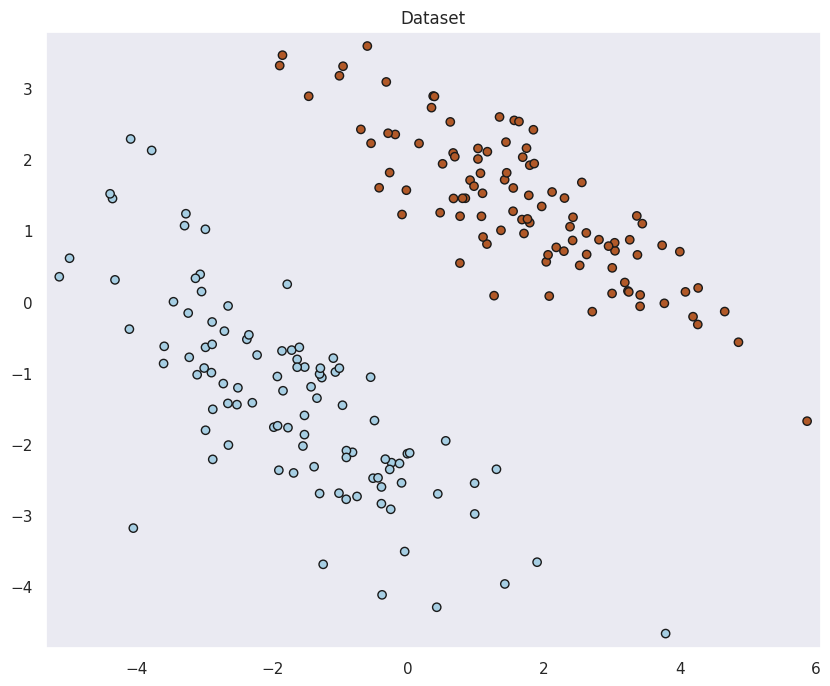

In [ ]:
plot_svm(x,y, 'Dataset')

Initialize and train the model

In [ ]:
from sklearn.svm import SVC # Support Vector Classification
# from sklearn.svm import SVR # Support Vector Regression

model = SVC(kernel='linear', random_state=42)
model.fit(x, y)
model.score(x, y) # accuracy is selected by defaullt

1.0

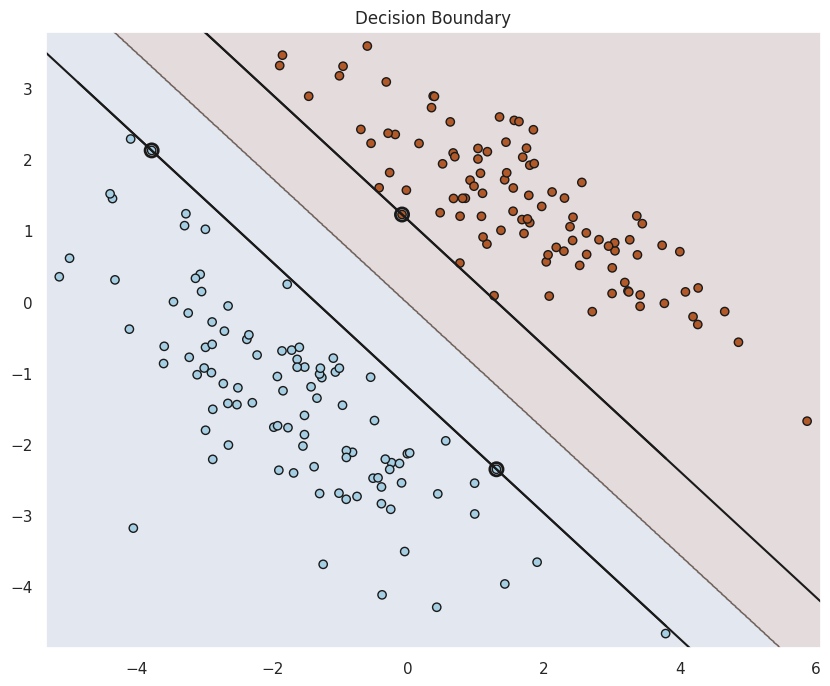

In [ ]:
plot_svm(x, y, title='Decision Boundary', model=model, margin=True)

We can also pass parameter C to the model by following
```
model = SVC(kernel='linear', random_state=42, C=1)
```
Since the dataset here is very simple, it is difficult to see the importance of parameter `C`


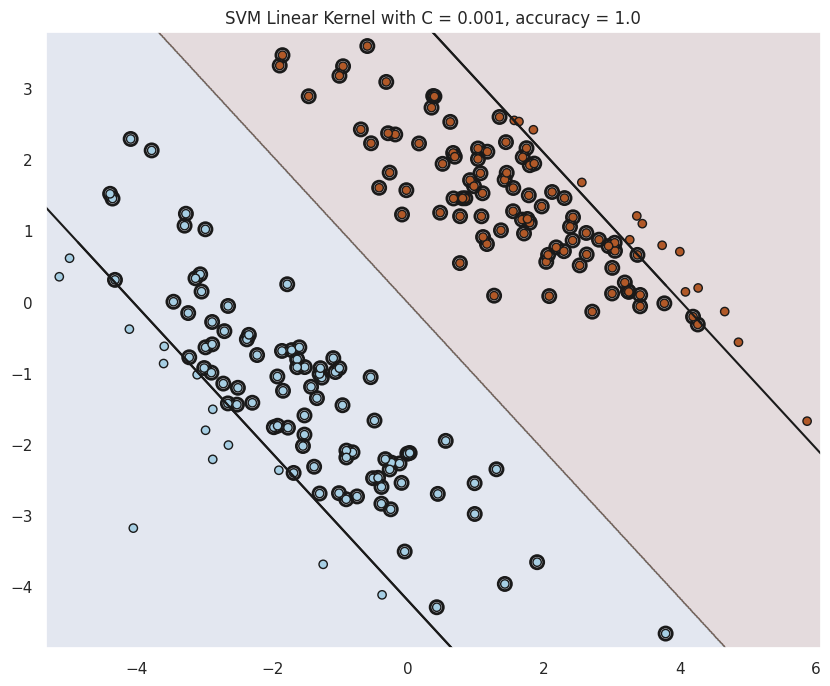

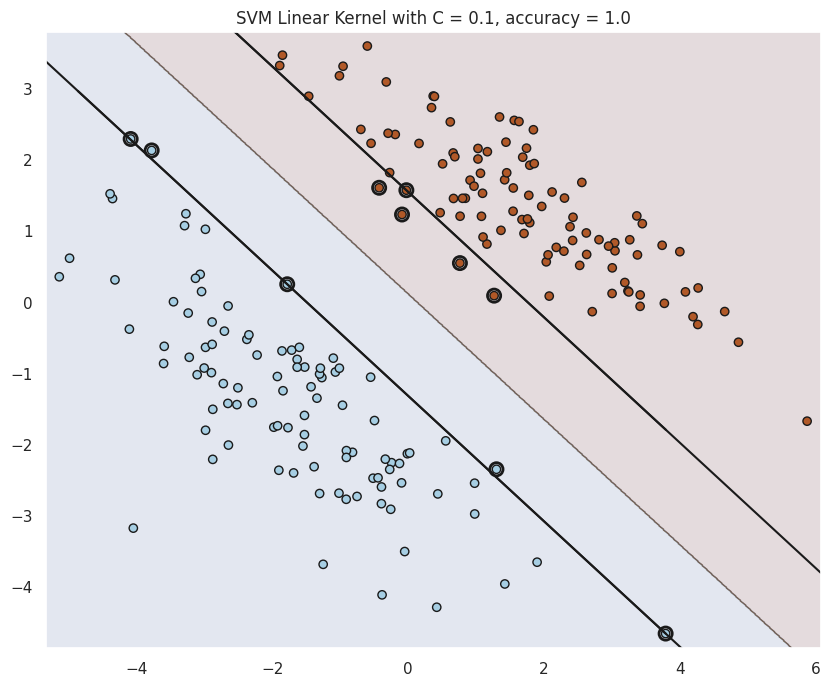

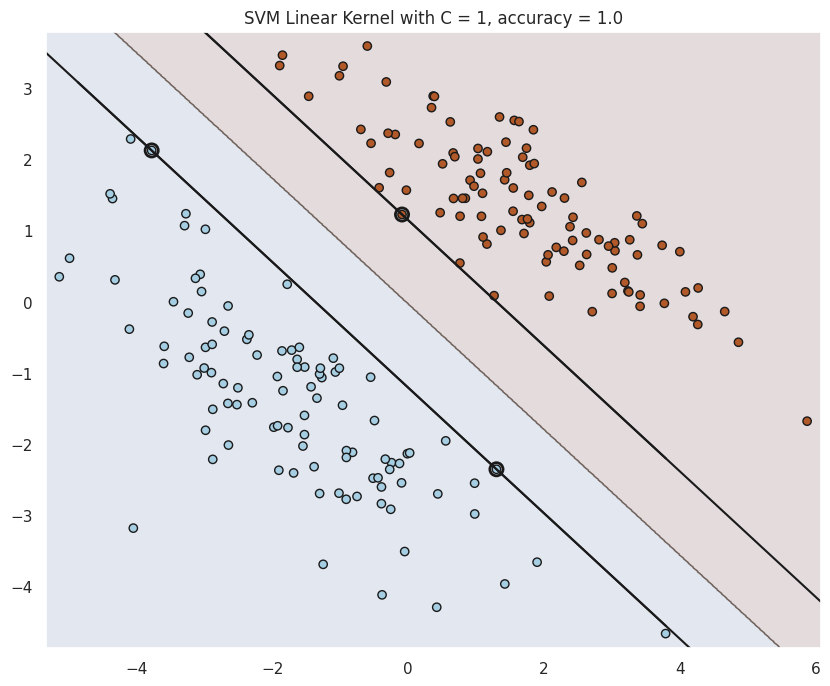

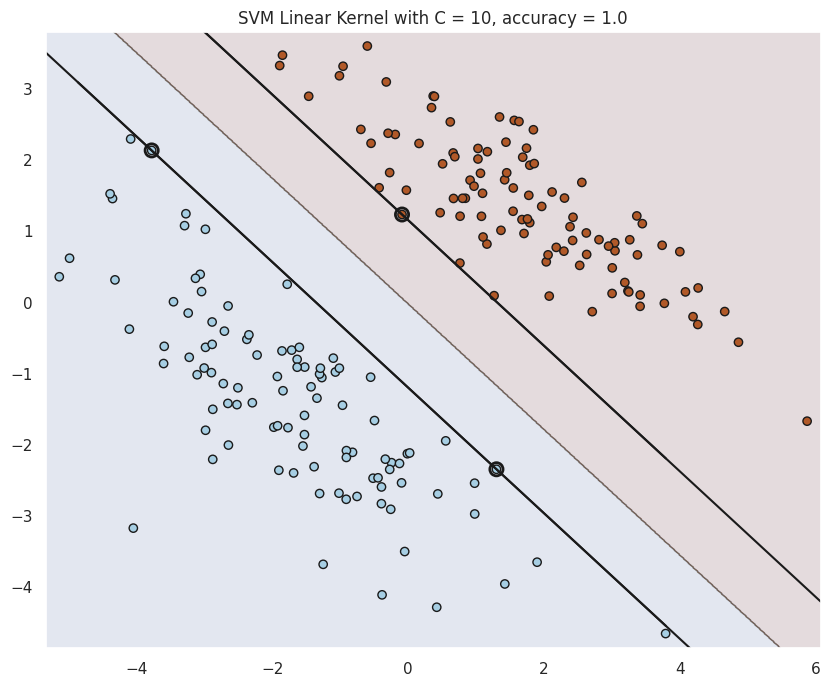

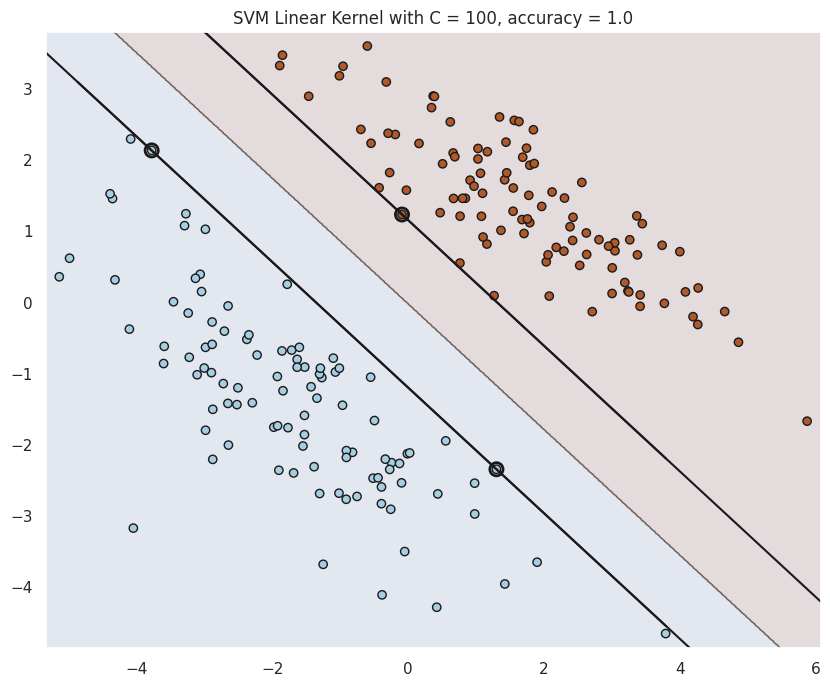

In [ ]:
C = [0.001, 0.1, 1, 10, 100]
for c in C:
  model = SVC(kernel='linear', C=c, random_state=42)
  model.fit(x,y)
  title = 'SVM Linear Kernel with C = {}, accuracy = {}'.format(c, model.score(x,y))
  plot_svm(x, y, title, model=model, margin=True)

### RBF Kernel

In [ ]:
def generate_spiral_data(n_sample_per_class=100, n_feature=2, n_class=2):
  np.random.seed(42)

  N = n_sample_per_class # number of points per class
  d0 = n_feature # dimensionality
  C = n_class # number of classes

  x = np.zeros((d0, N*C)) # data matrix (each row = single example)
  y = np.zeros(N*C, dtype='uint8') # class labels

  for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    x[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j
  x = x.T
  return x, y

In [ ]:
x, y = generate_spiral_data()
x.shape, y.shape

((200, 2), (200,))

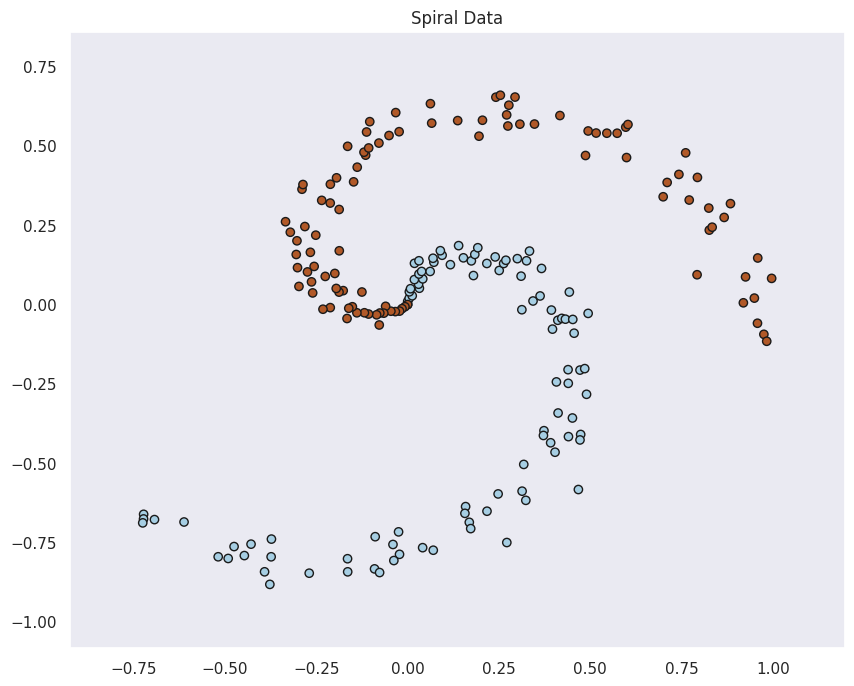

In [ ]:
plot_svm(x, y, title="Spiral Data")

Linear Kernel Accuracy: 0.76


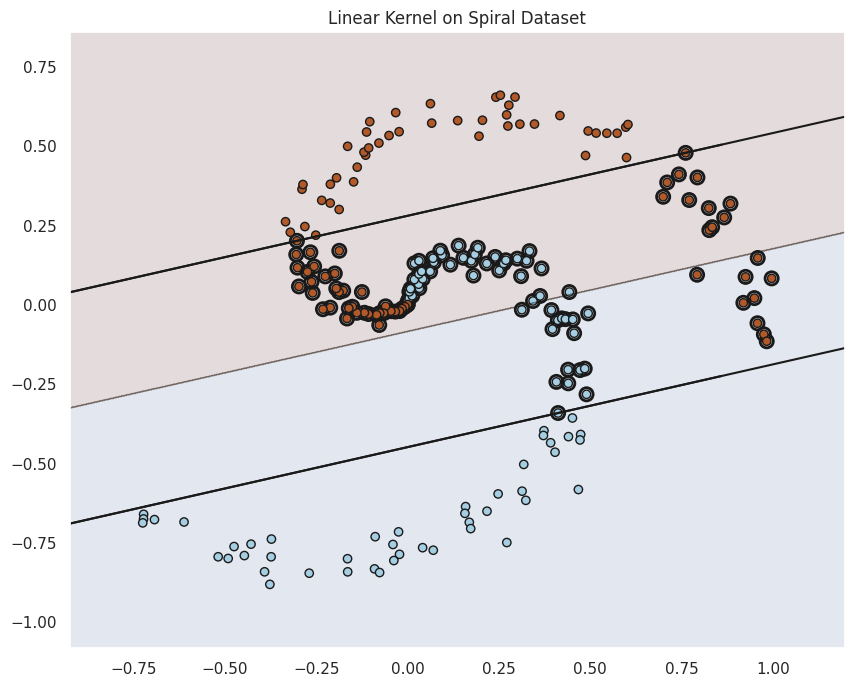

In [ ]:
model = SVC(kernel='linear', random_state=42)
model.fit(x, y)
print('Linear Kernel Accuracy:', model.score(x, y))
plot_svm(x,y,'Linear Kernel on Spiral Dataset', model, margin=True)

RBF Kernel Accuracy: 0.98


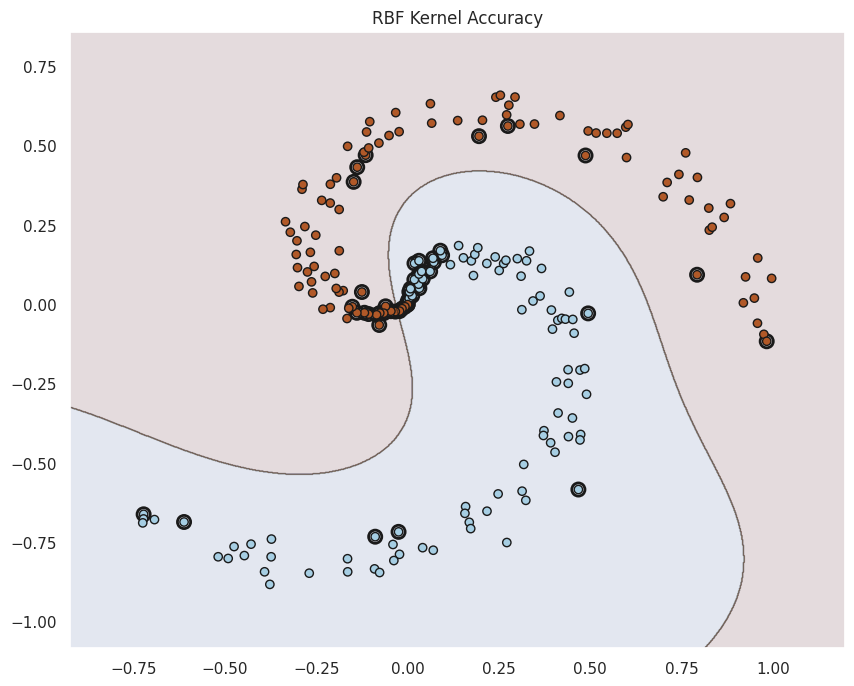

In [ ]:
model = SVC(kernel='rbf', random_state=42)
model.fit(x, y)
print('RBF Kernel Accuracy:', model.score(x, y))
plot_svm(x,y,'RBF Kernel Accuracy',model,margin=False)

Ta thử tinh chỉnh tham số **C** cho mô hình SVM với ``kernel='rbf'`` để xem Accuracy có được cải thiện không nhé

RBF Kernel Accuracy: 0.995


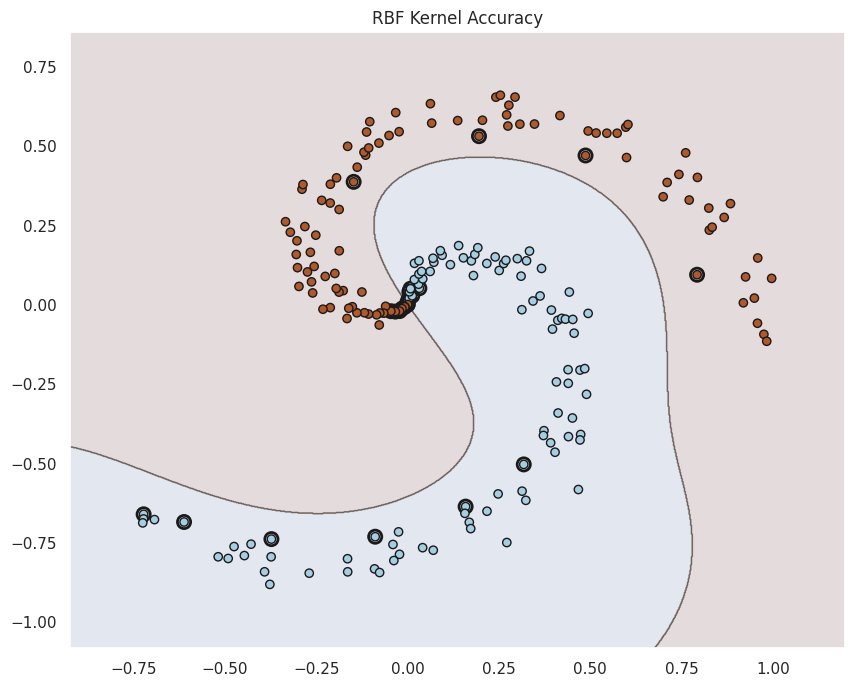

In [ ]:
model = SVC(kernel='rbf', C=20, random_state=42)
model.fit(x, y)
print('RBF Kernel Accuracy:', model.score(x, y))
plot_svm(x,y,'RBF Kernel Accuracy',model,margin=False)

### Hyper-parameters of SVM

The difference between hyper-parameter và learnable-parameter (model's parameters)
- Learnable-parameters: the set of model's parameters $Θ$, learned/trained from the dataset (weight ad bias)
- Hyper-parameters: Other attributes of model. Hyperparameters have an effect on the performance of the model, so should be **selected** thoroughly. Each model will have different superparameters. Ex:
  - MLP: Number of hidden layers, the number of units in each hidden layer
  - KNN: K numbers
  - SVM:
    - `kernel`
    - `C`
    - `gamma`



In [ ]:
def generate_data():
  x = np.array([[-4, 0.1],
                [-3, 0.1],
                [-2, 0.1],
                [-4, -0.1],
                [-3, -0.1],
                [-2, -0.1],
                [1,0],
                [4, 0.1],
                [3, 0.1],
                [2, 0.1],
                [4, -0.1],
                [3, -0.1],
                [2, -0.1],
                [-1,0]])
  y = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1])
  return x, y

x, y = generate_data()

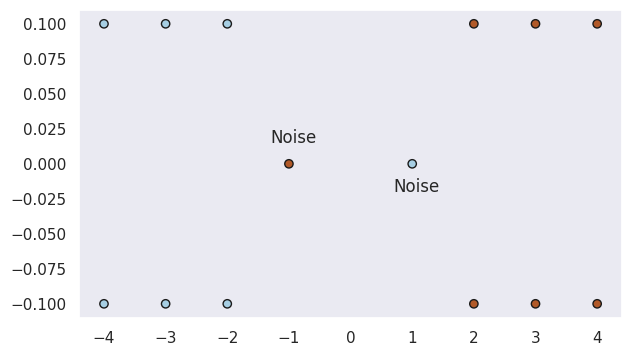

In [ ]:
# visualization
plt.figure(figsize=(7,4))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.text(-1.3, 0.015, 'Noise')
plt.text(0.7, -0.020, 'Noise')
plt.grid(None)
plt.show()

In [ ]:
def subplot_decision_boundary(x, y, title, model, show_support_vector=False):
  resolution=1000

  mins = x.min(axis=0) - 0.2
  maxs = x.max(axis=0) + 0.2

  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              cmap=plt.cm.Paired,alpha=0.1)
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              linewidths=1, colors='k',alpha=0.1)
  # Support Vectors
  if show_support_vector == True:
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=90,
                facecolors='none', edgecolors='k', linewidths=2)

  plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired,
                edgecolors='k')
  plt.xlim(mins[0],maxs[0])
  plt.ylim(mins[1],maxs[1])
  plt.grid(None)
  plt.title(title)

First we'll fix **gamma** to see how change C affects the result

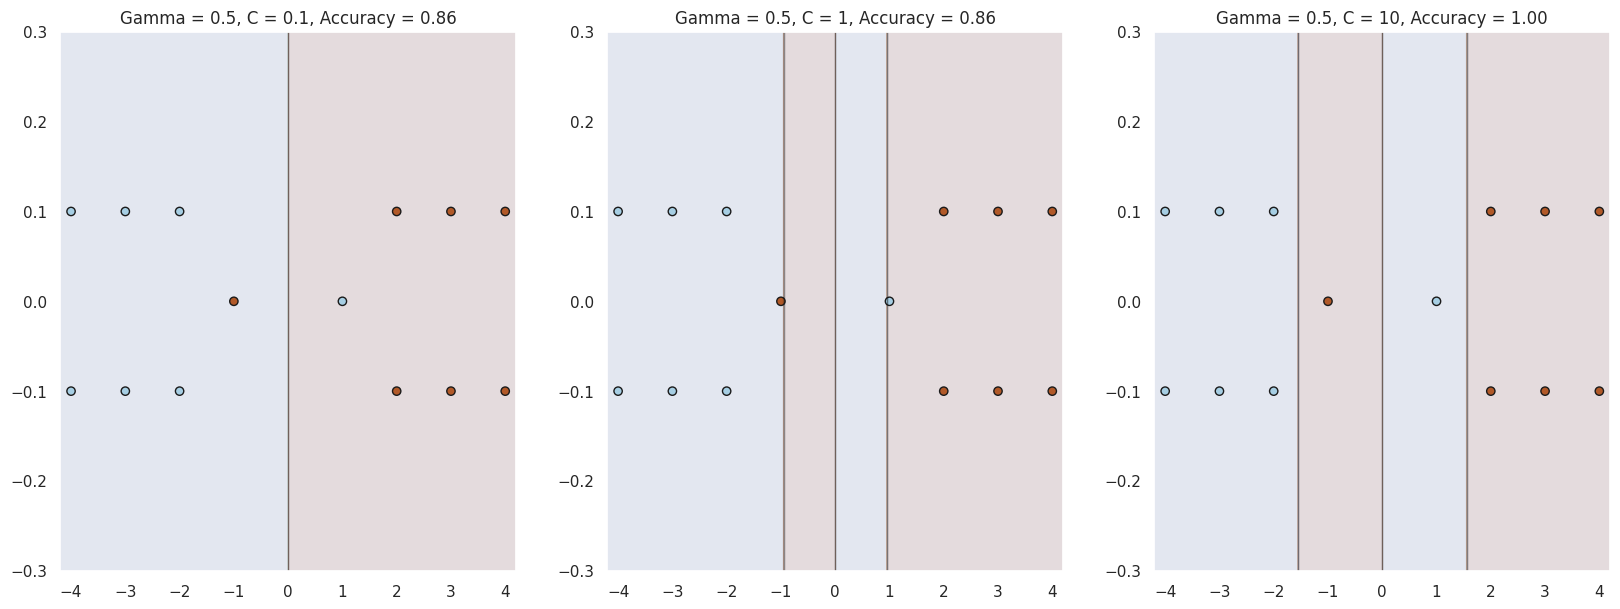

In [ ]:
C_values = [0.1, 1, 10]
plt.figure(figsize=(20,7))
for index, C in enumerate(C_values):
  model = SVC(kernel='rbf', gamma=0.5, C=C, random_state=42)
  model.fit(x, y)
  plt.subplot(1,3,index+1)
  title = 'Gamma = {}, C = {}, Accuracy = {:.2f}'.format(0.5, C, model.score(x,y))
  subplot_decision_boundary(x, y, title, model)

Remember that **C** acts as a penalty if the forecasting model is wrong
- **C** is large $\rightarrow$ Penalty is huge if prediction is wrong $\rightarrow$ The model must memorize train data (memorize noise) so it has high accuracy. However, this model when actually run will not be good.

What about **gamma**?

[Explanation Video about gamma from Udacity](https://www.youtube.com/watch?v=m2a2K4lprQw) (Có phụ đề tiếng Anh)

In [ ]:
def generate_spiral_data(n_sample_per_class=100, n_feature=2, n_class=2):
  np.random.seed(42)

  N = n_sample_per_class # number of points per class
  d0 = n_feature # dimensionality
  C = n_class # number of classes

  x = np.zeros((d0, N*C)) # data matrix (each row = single example)
  y = np.zeros(N*C, dtype='uint8') # class labels

  for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    x[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j
  x = x.T
  return x, y

x, y = generate_spiral_data()

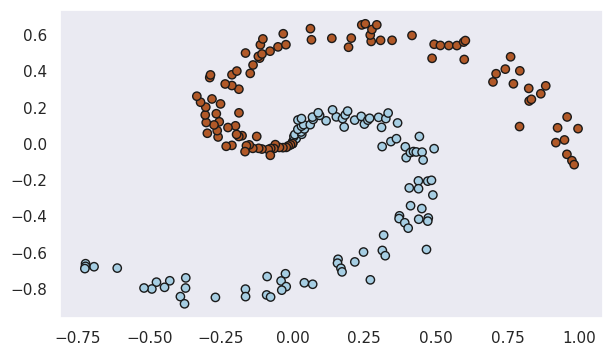

In [ ]:
plt.figure(figsize=(7,4))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.grid(None)
plt.show()

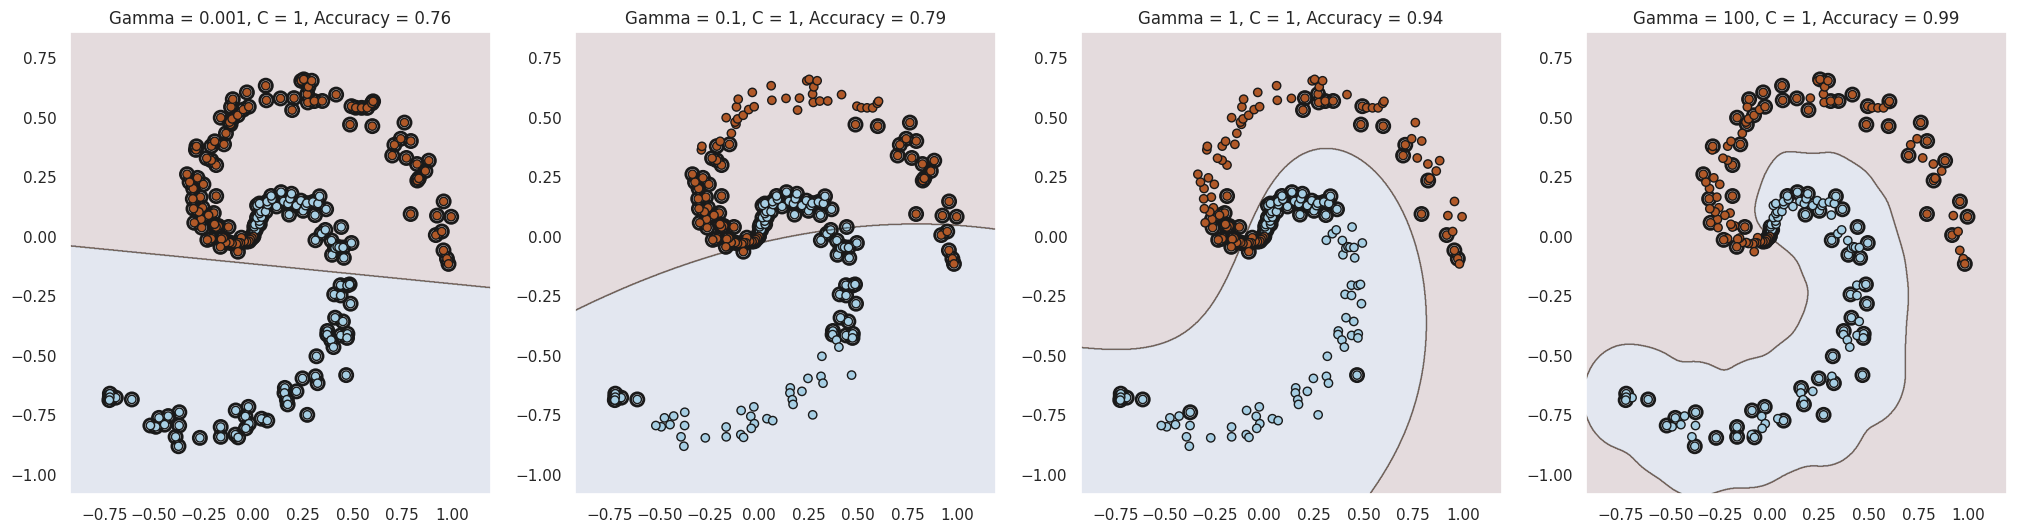

In [ ]:
gamma_values = [0.001, 0.1, 1, 100]
plt.figure(figsize=(25,6))
for index, gamma in enumerate(gamma_values):
  model = SVC(kernel='rbf', gamma=gamma, C=1, random_state=42)
  model.fit(x,y)
  plt.subplot(1, 4, index+1)
  title = 'Gamma = {}, C = {}, Accuracy = {:.2f}'.format(gamma, 1, model.score(x,y))
  subplot_decision_boundary(x, y, title, model, show_support_vector=True)

## Why not use the Metric as the Loss function

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

For example, we need to train the model to classify the following dataset:

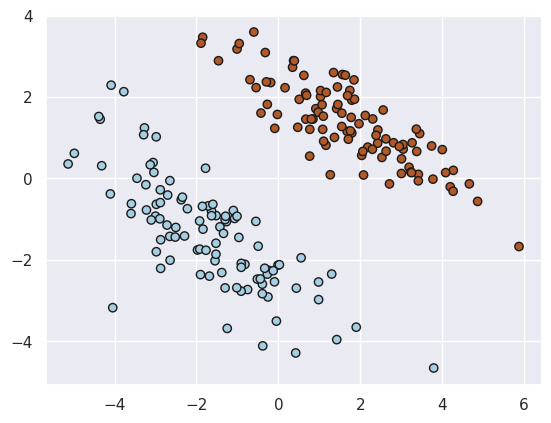

In [ ]:
def generate_linear_data(mean_pos, cov_pos, mean_neg, cov_neg, size):
  np.random.seed(42)
  # generate positive samples
  x_pos = np.random.multivariate_normal(mean_pos, cov_pos, size)
  y_pos = np.ones(size, dtype=int)
  # generate negative samples
  x_neg = np.random.multivariate_normal(mean_neg, cov_neg, size)
  y_neg = np.zeros(size, dtype=int)
  # concat into 1 array and return
  x = np.concatenate((x_pos, x_neg), axis=0)
  y = np.concatenate((y_pos, y_neg), axis=0)
  return x, y

MEAN_POS = [1.5, 1.5]
COV_POS = [[3, -2], [-2, 1]]
MEAN_NEG = [-1.5, -1.5]
COV_NEG = [[2, -2], [-2, 1]] # -2 or 1
SIZE = 100

x, y = generate_linear_data(MEAN_POS, COV_POS, MEAN_NEG, COV_NEG, SIZE)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(x,y)
model.coef_, model.intercept_

(array([[1.75589502, 2.04002751]]), array([-0.05111434]))

Model we choose is **Logistic Regression**, in form of
$$
\hat{y} = \text{sigmoid}(\text{w}^\text{T}\text{x} + \text{b})
$$
and is optimized with loss function: **Binary Crossentropy**
$$
\text{Loss} = -\frac{1}{m} \sum_{i=1}^{k}\text{y}_i \log (\hat{\text{y}}_i) + (1-\text{y}_i)\log(1-\hat{\text{y}}_i)
$$
Our purpose is to find 3 parameters **w1**, **w2** (we will collectively call w1 and w2 W) and **b** for the best model results, in session 7 we will learn the algorithm to find the optimal weight set.

Suppose we find **W** and **b** by randomly selecting $\rightarrow$ for each pair **(W, b)** we will get 1 value of the Loss function $\rightarrow$ if we select a lot of pairs **(W, b)** we will draw the shape of the Loss function (x-axis is w1, y-axis is w2 and z-axis is Loss) (Since 4-dimensional space cannot be visualized, we will set a fixed value for bias)

Similarly, for each pair **(W, b)** we will have 1 Accuracy value $\rightarrow$ we can also draw the shape of the Accuracy function

We build support functions

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def bce(y_true, y_pred):
  m = len(y_true)
  return (-1 / m) * np.sum(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))

def accuracy(y_true, y_pred):
  return np.mean(y_true==y_pred)

In [ ]:
w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)

ww1, ww2 = np.meshgrid(w1, w2)

loss = []

for i in range(100):
  for j in range(100):
    logits = ww1[i,j] * x[:, 0] + ww2[i,j] * x[:, 1] - 0.05111434
    y_pred = sigmoid(logits)
    loss.append(bce(y, y_pred))
loss = np.array(loss)

fig = go.Figure(data=[go.Surface(x=w1, y=w2, z=loss.reshape(100,100))])
fig.show()

Looking at the picture above, we see that if we put 1 marble in any position, the marble will definitely roll to the lowest place.

Similarly, we draw a picture of the relationship between **(w1, w2)** and Accuracy

In [ ]:
w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)

ww1, ww2 = np.meshgrid(w1, w2)

acc = []

for i in range(100):
  for j in range(100):
    logits = ww1[i,j] * x[:, 0] + ww2[i,j] * x[:, 1] - 0.05111434
    y_pred = sigmoid(logits)
    # convert y_pred from prob to 0, 1
    y_pred = y_pred >= 0.5
    acc.append(accuracy(y, y_pred))
acc = np.array(acc)
acc = np.round(acc, 1)
fig = go.Figure(data=[go.Surface(x=w1, y=w2, z=acc.reshape(100, 100))])
fig.show()

We have a ladder shape, in mathematics horizontal lines have a derivative of 0, so it is difficult to optimize with Accuracy
Simply put, there is a lot of room in the image above, if we put 1 marble there, the marble will stand still.

## Spam SMS Classification using SVM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Prepare the dataset

**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML-intensive/data/spam.csv', encoding='latin-1', usecols=[0,1],names=['Label','SMS'], header=0)
df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### TODO 1
In your opinion, we need to prioritize Precision or Recall for this problem:

Precision is the ratio of true positives (TP) to the total number of positives predicted (TP + FP). High precision means that the model has a low false positive rate, meaning that it will not be predicted to be positive when it is actually negative $→$ meaning that it will not be considered spam if it makes a ham. Conversely, low precision can spam if it is ham $→$ which means that users can miss important ham messages.


Recall is the ratio of true positives to the total number of actual postives (TP + FN). High recall means having a low false negative rate, meaning it won't miss positives $→$ will detect spam well. Conversely, low recall can miss $→$ spam, mistake spam for $→$ ham It's okay because users can put themselves into spam if it really spams $→$ but will avoid being missed important ham.




**ANSWER HERE**

Anwer here

In [ ]:
# retrieve the data of the SMS column as series
x = df['SMS']
# retrieve the data from Label column
# mapping 0-1 and convert into numpy array
y = df['Label'].map({'ham':0,'spam':1}).values

### TF-IDF

Remember that AI models take in data in the form of numbers. Therefore we will transform our data set from string of characters to numbers.

This time, we will use **Term Frequency-Inverse Document Frequency (TF-IDF)**. For example, we have a data set of 4 sentences as follows:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example

example_data = [
  'This is the first document.',
  'This document is the second document.',
  'And this is the third one.',
  'Is this the first document?',
  'How many documents that you have?'
]

# Use sklearn TF-IDF to extract features
tfidf = TfidfVectorizer()
tfidf.fit(example_data)

# The result will be a sparse matrix
csr = tfidf.transform(example_data)

# Unique word in the vocabulary
vocabulary = tfidf.get_feature_names_out()
print("Vocabulary:", vocabulary)
print("-"*20)

# convert csr matrix into normal matrix
print("Feature vector of 1st document:", csr.toarray()[0])

Vocabulary: ['and' 'document' 'documents' 'first' 'have' 'how' 'is' 'many' 'one'
 'second' 'that' 'the' 'third' 'this' 'you']
--------------------
Feature vector of 1st document: [0.         0.46756112 0.         0.56326535 0.         0.
 0.39332715 0.         0.         0.         0.         0.39332715
 0.         0.39332715 0.        ]


#### Explain TF-IDF

Algorithm TF-IDF includes 2 main components:
- Term Frequency (Count Vectorize)
- Inverse Document Frequency

In a simple way, TF-IDF will use the results of Count Vectorize and multiply by the importance of each word in the whole data set (IDF)

**Inverse Document Frequency**

Example of how to calculate the IDF of a word `"document"` (indicating the importance of `"document"` in the sentence)

**Note:** The `sklearn` library uses IDF formulas that are different from those you can find online
</br>

$$
  \text{IDF} = \log{(\frac{\text{Number of documents} + 1}{\text{Number of documents that "document" appear} + 1}) + 1}
$$
</br>


```python
idf("document") = log(5+1 / 3+1) + 1 = 1.40546
```
We do the same for all the words in the dictionary.

At this point, the vector representation for each document will be equal to the Count Vector multiplied by the corresponding IDFs and divided by the length of the vector itself (normalize)

Try manual calculation to check the TF-IDF results of the`sklear` library.

Normally, before using TF-IDF, we will preprocess the dataset in the following 2 ways:
- Lemmatization: transformation of words into their original form
  - Goes, Went, Going $→$ Go
  - AM, IS, ARE $→$ be
- Remove`stop_word`

The `sklearn` library supports `remove stop_words` but does not support Lemmatization, so we will use a very popular language processing library for English called `spacy`



In [ ]:
'''
load the pretrained model on spacy's English language processing
Remove unnecessary models (because we only need lemmatizers and stop words)
Running for the first time is a bit long because of waiting for the model to load
'''

import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

In [ ]:
my_text = "This is the first sentences"
doc = nlp(my_text)

lemma_words = [token.lemma_ for token in doc]
print(lemma_words)

lemma_text = " ".join(lemma_words)
print(lemma_text)
# if token.lemma_.lower() not in nlp.Defaults.stop_words

['this', 'be', 'the', 'first', 'sentence']
this be the first sentence


#### Applying Lemmatization + TF-IDF on the SMS data

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

def lemmatize(sentence):
  doc = nlp(sentence)
  lemma_words = [token.lemma_ for token in doc]
  lemma_text = " ".join(lemma_words)
  return lemma_text

# use progress_apply instead of apply to display progress bar
# .values to convert into numpy array
x = x.progress_apply(lemmatize).values
print(x[0])

  0%|          | 0/5572 [00:00<?, ?it/s]

go until jurong point , crazy .. available only in bugis n great world la e buffet ... Cine there get amore wat ...


In [ ]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf.fit(x)

'''
we use csr matrix to save memory
And sklearn models support training on Sparse Matrix -> faster speed than Dense Matrix
'''

x_csr = tfidf.transform(x)
print(x_csr.shape)

(5572, 7467)


That is, in the dataset there are
- 5572 messages
- 7467 distinct words, each sample in the dataset is represented by a characteristic 7467

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_csr, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=42)


print("Train Set: ", x_train.shape, y_train.shape)
print("Test Set: ", x_test.shape, y_test.shape)

Train Set:  (4457, 7467) (4457,)
Test Set:  (1115, 7467) (1115,)


### Applyinh SVM to classifying SMS

#### TODO 2

**Train the SVM (SVC)** on the Train set, then use the `f1_score` metric of `sklearn` to evaluate the model on both the Train and Test episodes


In [ ]:
# YOUR SOLUTION
from sklearn.svm import SVC
from sklearn.metrics import f1_score

model = SVC(kernel="rbf", random_state=42)
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f1_score(y_train, y_train_pred))
print(f1_score(y_test, y_test_pred))

0.9932659932659933
0.8847583643122676


### Classification Report và Confusion Matrix

We can draw a Confusion Matrix using sklearn's `confusion_matrix` in combination with a heatmap.

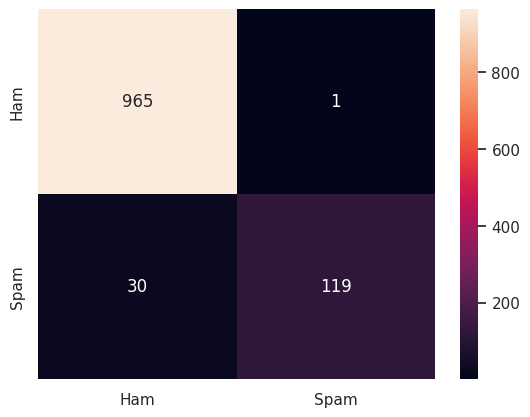

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.show()

We can use the metric `classification_report` to print a detailed report of the model's results

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred, target_names=['ham', 'spam'], digits=3))

              precision    recall  f1-score   support

         ham      0.970     0.999     0.984       966
        spam      0.992     0.799     0.885       149

    accuracy                          0.972      1115
   macro avg      0.981     0.899     0.934      1115
weighted avg      0.973     0.972     0.971      1115



 **Macro Average**: nghĩa là trung bình của Precision/Recall/F1 cho toàn bộ class. Ví dụ Macro Average Precision được tính như sau:

  $$
  \frac{\text{precision}_0 + \text{precision}_1 + \text{precision}_2 + ... + \text{precision}_9}{10}
  $$

**Weighted Average**: nghĩa là trung bình **có trọng số** của Precision/Recall/F1 cho toàn bộ class. Ví dụ Weighted Average Precision được tính như sau:

  $$
  \frac{\text{precision}_0 * \text{support}_0 + \text{precision}_1 * \text{support}_0 + ... + \text{precision}_9 * \text{support}_9}{\text{support}_0 + \text{support}_1 + ... \text{support}_9}
  $$
     

### K-fold Cross Validation

The K-fold Cross-validation technique is used to ensure that the predicted results of the model do not depend on how the Train-Val-Test data is divided (in case we do not have a lot of data)

![](https://miro.medium.com/max/2984/1*pJ5jQHPfHDyuJa4-7LR11Q.png)

- First divided into Train and Test episodes
- Split the Train episode into **k-equal parts** (**k-fold**)
- Use **k-1 part** as Train set and **1 part** as Validation $\rightarrow$ Train k models in total
- Model evaluation metrics will be averaged on **k Validation set**


In `sklearn` we use the `cross_validate` function to perform K-Fold Cross Validation. This function needs to pass to the list of metrics to be used as a `string`. You can see this list here https://scikit-learn.org/stable/modules/model_evaluation.html


In [ ]:
from sklearn.model_selection import cross_validate

model = SVC(kernel="rbf", random_state=42)
cv_scores = cross_validate(model, x_train, y_train, cv=5, scoring=("f1", "accuracy"))
cv_scores

{'fit_time': array([0.98116684, 0.68903351, 0.6953361 , 0.89529037, 0.91570067]),
 'score_time': array([0.18814945, 0.11749649, 0.16170931, 0.15957046, 0.16034961]),
 'test_f1': array([0.88479263, 0.91479821, 0.88990826, 0.86255924, 0.85714286]),
 'test_accuracy': array([0.97197309, 0.97869955, 0.97306397, 0.9674523 , 0.96632997])}

Notice the `key` of the variable `cv_scores`. To calculate the average, we use the `mean` function of numpy

In [ ]:
mean_accuracy = cv_scores["test_accuracy"].mean()
mean_f1 = cv_scores["test_f1"].mean()

print("Mean accuracy:" , mean_accuracy)
print("Mean f1:" , mean_f1)

Mean accuracy: 0.9715037771838968
Mean f1: 0.8818402377471779


### Grid Search Cross Validation

It combines Grid Search and K-fold Cross Validation to find the best hyper-parameters.

`sklearn` provide us with classes `GridSearchCV` to do this

![](https://i.imgur.com/tHizQsd.png)


Suppose we have **5 hyper-parameter** that need to be optimized. Each hyper-parameter has **6 values to select**

$\rightarrow$ We have to train a total of $6^5$ model.

Combine GridSearch with Cross Validation (k=10)

$\rightarrow$ We have to train a total of $6^5 times $10 models.

The model (with hyper-parameters) with the best cross validation score will be selected. **We then train this model on the entire Train data.**

We will apply GridSearchCV to find the best set of parameters for the SVM model on this SMS classification problem.
- Which kernel is best (linear | poly | rbf) (the type of kernel is also hyper-parameter)
- Which C is Best
- Which gamma is best




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define values to search (C and gamma)
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

'''
Because the rbf kernel has an extra gamma parameter, the linear kernel and poly do not
We need to define 2 ways to search:
  - With rbf kernel, search all C and gamma
  - With the linar kernel, poly search C
'''

rbf_search = {'kernel': ['rbf'], 'gamma': gamma_values, 'C': C_values}
linear_poly_search = {'kernel': ['linear','poly'], 'C': C_values}

'''
Now do the following steps:
  - Create a list containing all search methods
  - Call GridSearchCV, pass in the model, search and fold number
  - Perform fitting
  - Print the best hyper-parameter set
  - Take out best model
  - Evaluate on the Test set
'''

param_grid = [rbf_search, linear_poly_search]
model = SVC(random_state=42)
grid = GridSearchCV(model, param_grid, cv=3, scoring="f1")
grid.fit(x_train, y_train)
print(grid.best_params_)
best_model = grid.best_estimator_
y_pred_test = best_model.predict(x_test)
print('F1 on Test:',f1_score(y_test,y_pred_test))

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
F1 on Test: 0.9361702127659575


Confusion Matrix mới

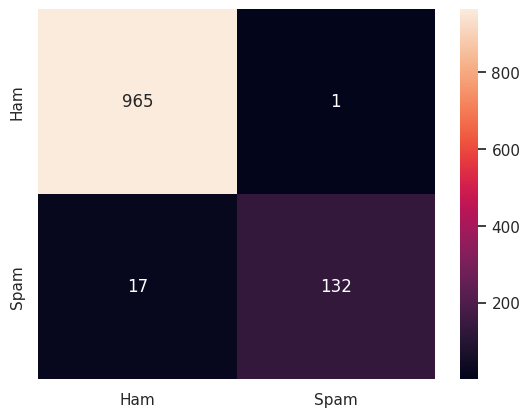

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.show()

#### TODO 3

Looking at the GridSearchCV sample code above, how many models do you think we need to train in total?

**ANSWER HERE**


#### Optional: Error Analysis

Try printing out the mispredicted sentences to see what is special about them that makes the model unpredictable